<a href="https://colab.research.google.com/github/Dua-Sharif/Machine-Learning/blob/main/Lab3_AI_22303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cost function & Gradient Descent for Multi Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dataset= pd.read_csv('/content/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X = dataset[['R&D Spend', 'Administration', 'Marketing Spend']].values
y = dataset['Profit'].values

In [ ]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)

In [ ]:
X = np.c_[np.ones(X.shape[0]), X]

In [ ]:
theta = np.zeros(X.shape[1])
alpha = 0.01  # Learning rate
iterations = 500
m = len(y)
cost_history = []

In [ ]:
def cost_func(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    return np.sum(errors ** 2)/(2 * m)


In [ ]:

def gradient_descent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        theta -= (alpha / m) * X.T.dot(X.dot(theta) - y)
        cost_history.append(cost_func(X, y, theta))
    return theta

theta = gradient_descent(X, y, theta, alpha, iterations)
intercept = theta[0]  # Intercept (theta_0)
slopes = theta[1:]    # Slopes (theta_1, theta_2, ...)

# Final cost from the cost history (the last value in the list)
final_cost = cost_history[-1]

# Display results
print(f"Intercept (θ₀): {intercept}")
print(f"Slopes (θ₁, θ₂, ...): {slopes}")
print(f"Final Cost Function Value: {final_cost}")

Intercept (θ₀): -4.3587355946783327e-16
Slopes (θ₁, θ₂, ...): [ 0.87428893 -0.00339231  0.12376612]
Final Cost Function Value: 0.025056935314671017


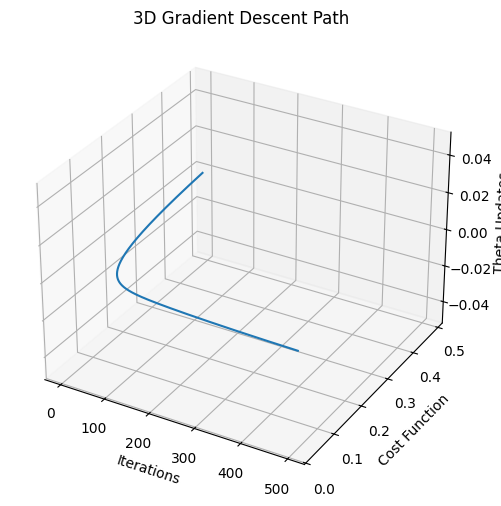

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(range(iterations), cost_history, zs=0, zdir='z', label='Gradient Descent Curve')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Function')
ax.set_zlabel('Theta Updates')
ax.set_title('3D Gradient Descent Path')
plt.show()